In [1]:
def to_rad(deg):
    return deg * (np.pi / 180)

def to_deg(rad):
    return rad / (np.pi / 180)

import matplotlib.pyplot as plt
import numpy             as np
import csv
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

In [54]:
def read_csv(path):
    '''
    '''

    x_list = np.array([])
    y_list = np.array([])

    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            x = row[0]
            y = row[1]
            x_list = np.append(x_list, x)
            y_list = np.append(y_list, y)           
    return x_list, y_list

normal_x_list, normal_y_list = read_csv('../../build/normal-yaw-pos.csv')
steer_x_list, steer_y_list = read_csv('../../build/steer-yaw-pos.csv')
kafi_x_list, kafi_y_list = read_csv('../../build/kafi-yaw-pos.csv')
# test_x_list, test_y_list = read_csv('../../build/test-pos.csv')

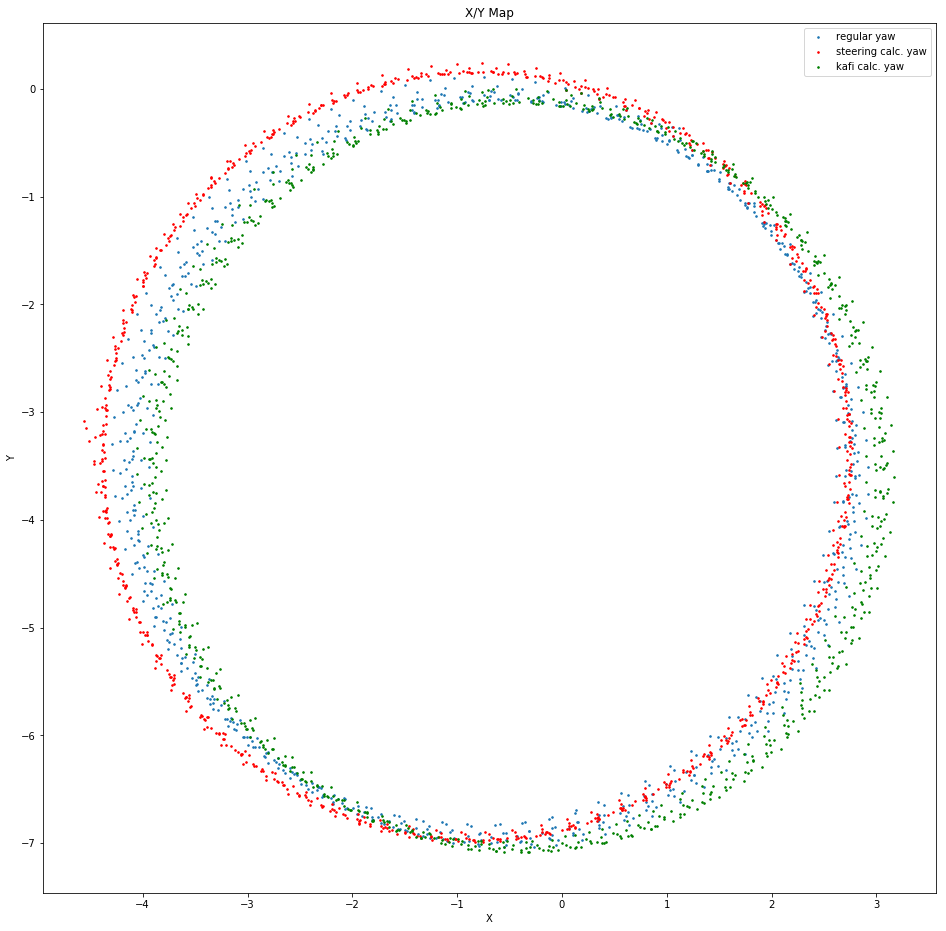

In [57]:
fig, ax = plt.subplots(figsize=(16,16))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("X/Y Map")

cut = 5000

ax.scatter(normal_x_list[:cut], normal_y_list[:cut], s = 2.5, label = 'regular yaw')
ax.scatter(steer_x_list[:cut], steer_y_list[:cut], s = 2.5, color = 'red', label = 'steering calc. yaw')
ax.scatter(kafi_x_list[:cut], kafi_y_list[:cut], s = 2.5, color = 'green', label = 'kafi calc. yaw')

# ax.scatter(test_x_list[:cut], test_y_list[:cut], s = 2.5, label = 'regular yaw')


plt.legend()
plt.show()

In [ ]:
def read_csv(path):
    '''
    '''

    normal_yaw_list = np.array([])
    steer_yaw_list = np.array([])
    kafi_yaw_list = np.array([])
    
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            normal_yaw = row[0]
            steer_yaw  = row[1]
            kafi_yaw   = row[2]
            normal_yaw_list = np.append(normal_yaw_list, normal_yaw)
            steer_yaw_list = np.append(steer_yaw_list, steer_yaw)
            kafi_yaw_list = np.append(kafi_yaw_list, kafi_yaw)
            
    return normal_yaw_list, steer_yaw_list, kafi_yaw_list3


normal_yaw_list, steer_yaw_list, kafi_yaw_list = read_csv('../../build/yaws.csv')

fig, ax = plt.subplots(figsize=(14,14))

ax.set_xlabel('Time')
ax.set_ylabel('Car Yaw in rad')
ax.set_title("Yaw comparisson")

plt.plot(normal_yaw_list, label='bosch')
# plt.plot(steer_yaw_list, label='steering calc.')
# plt.plot(kafi_yaw_list,  label='kalman')
plt.legend()
plt.grid()
plt.show()

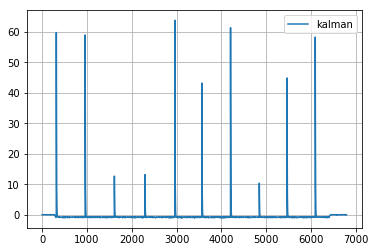

In [116]:
plt.plot(kafi_yaw_list,  label='kalman')
plt.legend()
plt.grid()
plt.show()

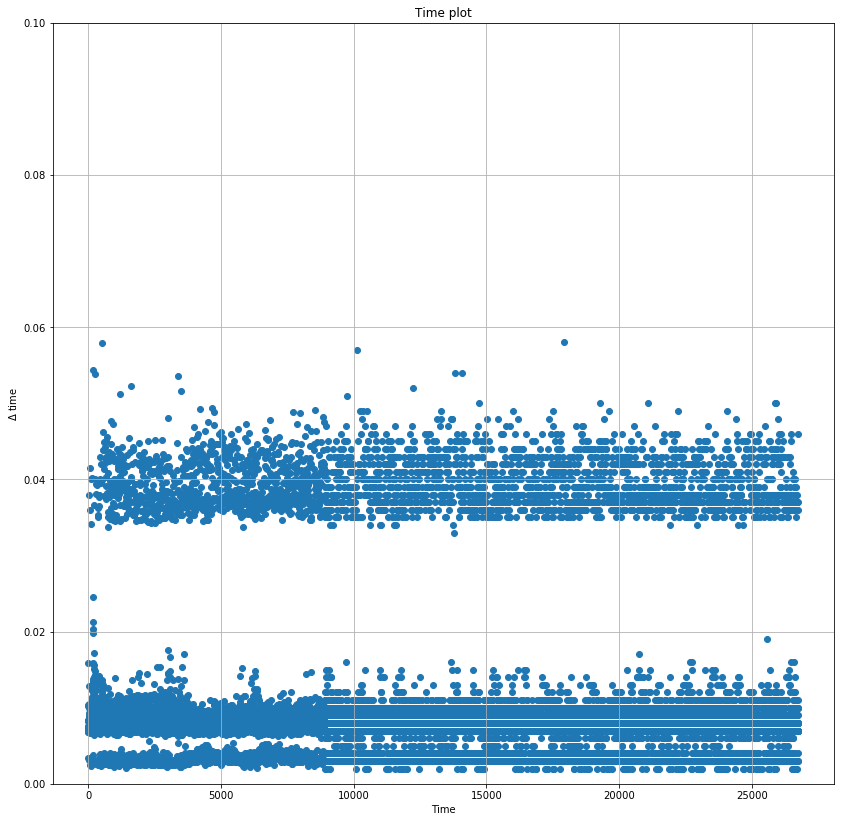

In [45]:
def read_csv(path):
    '''
    '''

    time_list = np.array([])
    
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            time = row[0]
            time_list = np.append(time_list, float(time))            
    return time_list


time_list = read_csv('../../build/time.csv')
x = np.arange(0, len(time_list))
fit = np.polyfit(x, time_list, 1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize=(14,14))

ax.set_xlabel('Time')
ax.set_ylabel('$\Delta$ time')
ax.set_title("Time plot")

#plt.plot(normal_yaw_list, label='bosch')

# print(len(time_list))

plt.ylim(0, 0.1)
plt.scatter(x, time_list)
# plt.plot(x, time_list, 'yo', x, fit_fn(x), '--k')
plt.legend()
plt.grid()
plt.show()

In [41]:
help(fit_fn)

Help on poly1d in module numpy.lib.polynomial object:

class poly1d(__builtin__.object)
 |  A one-dimensional polynomial class.
 |  
 |  A convenience class, used to encapsulate "natural" operations on
 |  polynomials so that said operations may take on their customary
 |  form in code (see Examples).
 |  
 |  Parameters
 |  ----------
 |  c_or_r : array_like
 |      The polynomial's coefficients, in decreasing powers, or if
 |      the value of the second parameter is True, the polynomial's
 |      roots (values where the polynomial evaluates to 0).  For example,
 |      ``poly1d([1, 2, 3])`` returns an object that represents
 |      :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2, 3], True)`` returns
 |      one that represents :math:`(x-1)(x-2)(x-3) = x^3 - 6x^2 + 11x -6`.
 |  r : bool, optional
 |      If True, `c_or_r` specifies the polynomial's roots; the default
 |      is False.
 |  variable : str, optional
 |      Changes the variable used when printing `p` from `x` to `variable`